#Simple Frontal HaarCascade Face Detection:

In [4]:
import cv2
from google.colab.patches import cv2_imshow

Read image:

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Coding/FaceDetector/well.png')
#cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.

Resize image:

In [ ]:
image = cv2.resize(image, (800, 600))

Convert to grayscale:

In [ ]:
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

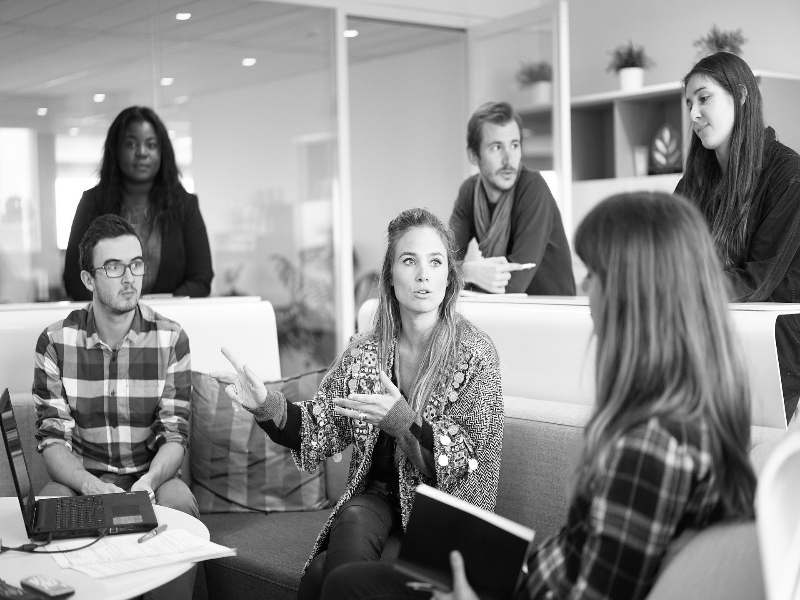

In [ ]:
cv2_imshow(imageGray)

Apply the haarcascade classifier from CV2:

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

The scaleFactor parameter is for finetuning; 1.09 was found by trial and error as it yields the best results: no false positives and no false negatives!

In [ ]:
# detected = face_cascade.detectMultiScale(imageGray)
detected = face_cascade.detectMultiScale(imageGray, scaleFactor = 1.09)

First two parameters represent x,y coordinates of upper left corner. The last two represent the lower right corner.

In [ ]:
detected

array([[678,  74,  65,  65],
       [113, 122,  56,  56],
       [475, 122,  60,  60],
       [386, 232,  74,  74],
       [ 90, 238,  69,  69]], dtype=int32)

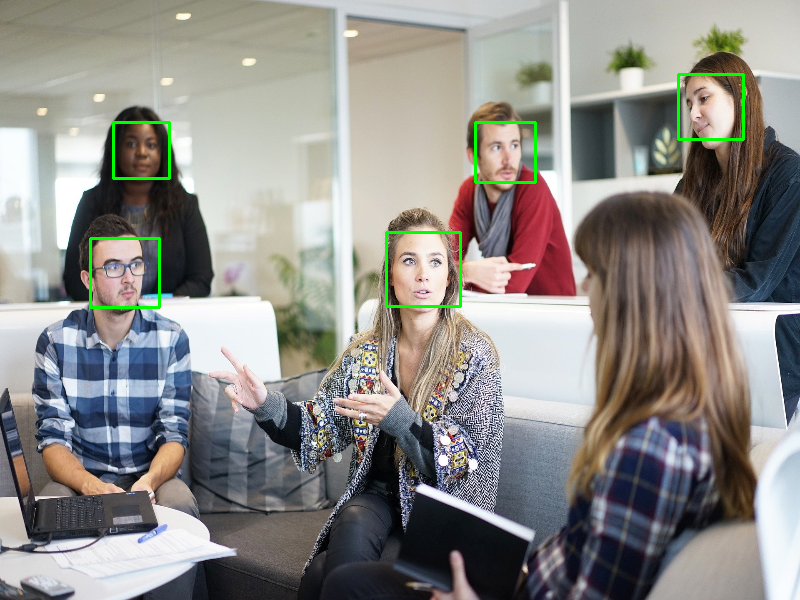

In [ ]:
for (x,y,w,h) in detected:
  cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)

#cv2_imshow(image)

#Some other parameters to care about:


In [ ]:
image2 = cv2.imread('/content/drive/MyDrive/Coding/FaceDetector/people2.jpg')

In [ ]:
detected = face_cascade.detectMultiScale(image2, minNeighbors = 7, minSize = (45,45), maxSize = (100,100))

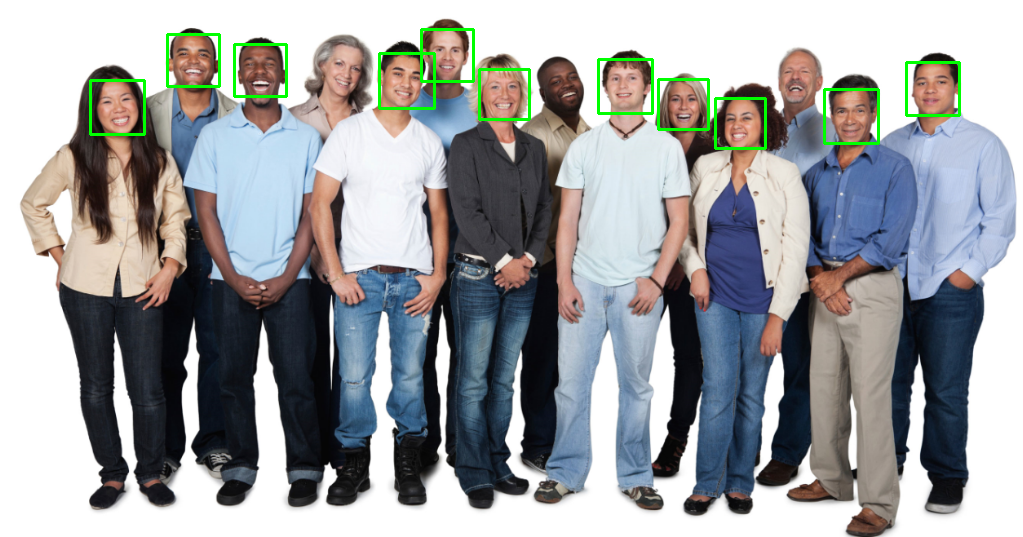

In [ ]:
for (x,y,w,h) in detected:
  cv2.rectangle(image2, (x,y), (x+w,y+h), (0,255,0), 2)

#cv2_imshow(image2)

# Eye detection:

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Coding/FaceDetector/well.png')
#image = cv2.resize(image, (800,500))

In [ ]:
eye_detector = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

In [ ]:
eye_detections = eye_detector.detectMultiScale(image, scaleFactor = 1.1, minNeighbors = 10, maxSize = (45,45))

In [ ]:
for (x,y,w,h) in eye_detections:
  cv2.rectangle(image, (x,y), (x+w,y+h), (255,0,0), 2)

cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.

# Clock detector:

In [ ]:
clock_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Coding/FaceDetector/clocks.xml')

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Coding/FaceDetector/clock.jpg')

In [ ]:
detected_clocks = clock_detector.detectMultiScale(image, scaleFactor = 1.01, minSize = (55,55), maxSize = (100,100))

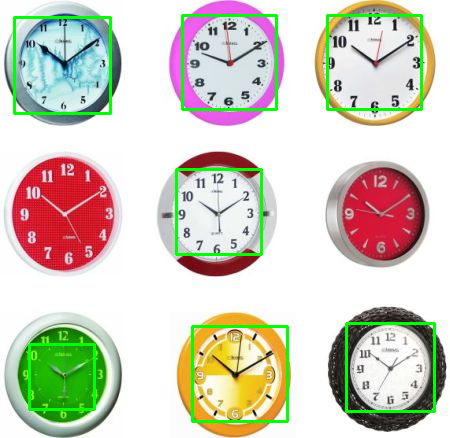

In [ ]:
for (x,y,w,h) in detected_clocks:
  cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)

cv2_imshow(image)

#HOG Detector

In [2]:
import dlib

In [4]:
image = cv2.imread('/content/drive/MyDrive/Coding/FaceDetector/people2.jpg')

In [5]:
face_detector_hog = dlib.get_frontal_face_detector()

In [7]:
detections = face_detector_hog(image, 1)

Rectangle entries represent bounding box:

In [8]:
detections

rectangles[[(429, 38) (465, 74)], [(665, 90) (701, 126)], [(717, 103) (760, 146)], [(909, 70) (952, 113)], [(828, 98) (871, 142)], [(605, 70) (641, 106)], [(777, 62) (813, 98)], [(485, 78) (521, 114)], [(386, 60) (429, 103)], [(170, 41) (213, 84)], [(93, 89) (136, 132)], [(237, 50) (280, 94)], [(323, 50) (367, 94)], [(544, 65) (588, 108)]]

In [12]:
for face in detections:
  l,t,r,b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image, (l,t), (r,b), (255,255,0), 2)

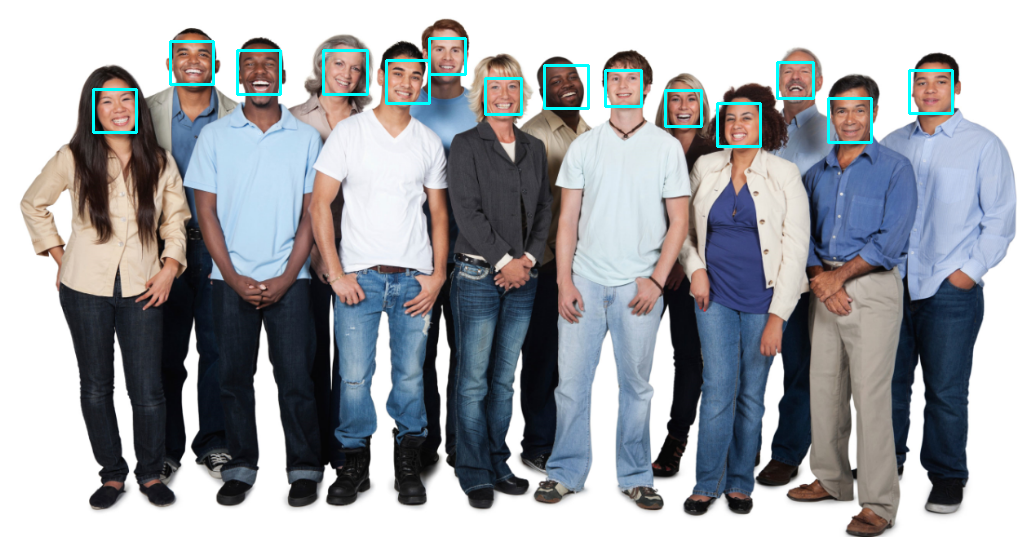

In [13]:
cv2_imshow(image)

#CNN:



In [5]:
image = cv2.imread('/content/drive/MyDrive/Coding/FaceDetector/people2.jpg')

In [6]:
cnn_detector = dlib.cnn_face_detection_model_v1('/content/drive/MyDrive/Coding/FaceDetector/mmod_human_face_detector.dat')

In [7]:
detections = cnn_detector(image, 1)

In [11]:
for face in detections:
  l,t,r,b,c = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
  print(c)
  cv2.rectangle(image, (l,t), (r,b), (255,255,0), 2)

1.1440614461898804
1.137049913406372
1.1278995275497437
1.1200283765792847
1.1149375438690186
1.1131553649902344
1.0975688695907593
1.0942121744155884
1.085315227508545
1.0801889896392822
1.0800762176513672
1.0784764289855957
1.066403865814209
1.0641791820526123


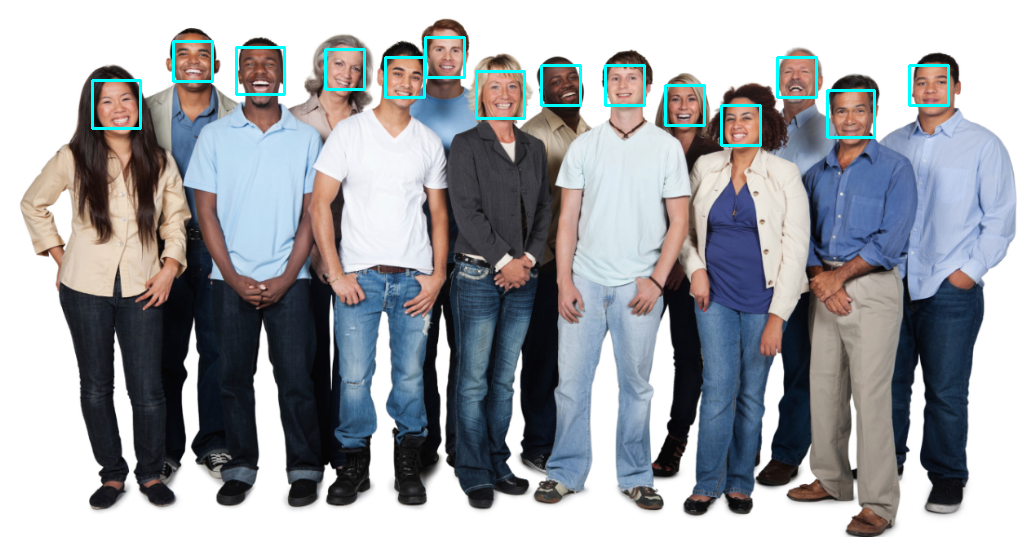

In [10]:
cv2_imshow(image)